# Vehicle Insurance Fraud Detection
Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated. The goal of this project is to use the collection of features to predict whether or not a claim is fraudulent.

# About this dataset
This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc. The target is whether claim application is fraudulent or not - FraudFound_P

In [1]:
import pandas as pd
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/1vvJdGZr935i5wDAFh2s0s8NUM5O0ni9n/view?usp=drive_link" # share link to data set

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For handling class imbalance
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE

# Set some visualization defaults
plt.style.use("default")
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [3]:
#Basic Data Info and Summaries

# 1.1 Shape of the data (rows, columns)
print("Dataset shape:", df.shape)

Dataset shape: (15420, 33)


In [4]:
# 1.2 Column names
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy']


In [5]:
# 1.3 Data types and non-null counts
print("\nData types and non-null counts:")
df.info()


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  Fra

In [6]:
# 1.4 Number of missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


In [8]:
# 1.6 Number of unique values for each variable
print("\nUnique value counts per column:")
print(df.nunique())


Unique value counts per column:
Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePol

In [9]:
# 1.7 Statistical summary for numerical variables
print("\nDescriptive statistics for numerical variables:")
print(df.describe().T)


Descriptive statistics for numerical variables:
                      count         mean          std     min      25%  \
WeekOfMonth         15420.0     2.788586     1.287585     1.0     2.00   
WeekOfMonthClaimed  15420.0     2.693969     1.259115     1.0     2.00   
Age                 15420.0    39.855707    13.492377     0.0    31.00   
FraudFound_P        15420.0     0.059857     0.237230     0.0     0.00   
PolicyNumber        15420.0  7710.500000  4451.514911     1.0  3855.75   
RepNumber           15420.0     8.483268     4.599948     1.0     5.00   
Deductible          15420.0   407.704280    43.950998   300.0   400.00   
DriverRating        15420.0     2.487808     1.119453     1.0     1.00   
Year                15420.0  1994.866472     0.803313  1994.0  1994.00   

                       50%       75%      max  
WeekOfMonth            3.0      4.00      5.0  
WeekOfMonthClaimed     3.0      4.00      5.0  
Age                   38.0     48.00     80.0  
FraudFound_P      

In [10]:
#DEFINE TARGET & IDENTIFY VARIABLE TYPES

target_col = "FraudFound_P"

# Make sure the target exists
assert target_col in df.columns, "Target column 'FraudFound_P' not found. Check column names."

In [11]:
# Separate out features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

In [13]:
# 2.1 Identify initial numeric and categorical columns by dtype
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Initial numeric columns:", numeric_cols)
print("Initial categorical columns:", categorical_cols)

Initial numeric columns: ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']
Initial categorical columns: ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [14]:
# 2.2 Some numeric columns might actually be categorical (e.g. WeekOfMonth, RepNumber, etc.)
# We will move them from numeric_cols to categorical_cols if they are present.

numeric_but_categorical = [
    "WeekOfMonth", "DriverRating", "PastNumberOfClaims",
    "NumberOfSuppliments", "NumberOfCars", "RepNumber"
]

# Find which of the above exist in our dataset
numeric_but_categorical = [col for col in numeric_but_categorical if col in X.columns]

# Move them from numeric to categorical
for col in numeric_but_categorical:
    if col in numeric_cols:
        numeric_cols.remove(col)
        categorical_cols.append(col)

print("\nAfter reclassification:")
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


After reclassification:
Numeric columns: ['WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'Deductible', 'Year']
Categorical columns: ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy', 'WeekOfMonth', 'DriverRating', 'RepNumber']


In [15]:
# 2.3 Drop pure ID columns (e.g., PolicyNumber) since they are not useful predictors.
id_cols = [col for col in ["PolicyNumber"] if col in X.columns]  # add more IDs if needed
print("\nID-like columns to drop:", id_cols)

X = X.drop(columns=id_cols)


ID-like columns to drop: ['PolicyNumber']


Target distribution:
FraudFound_P
0    14497
1      923
Name: count, dtype: int64

Target distribution (normalized):
FraudFound_P
0    0.9401
1    0.0599
Name: proportion, dtype: float64


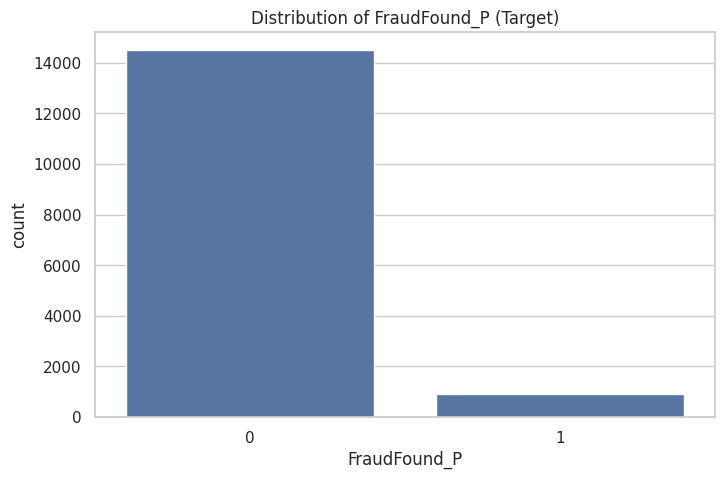

In [17]:
#UNIVARIATE ANALYSIS

# 3.1 Target variable distribution and class imbalance
print("Target distribution:")
print(y.value_counts())

print("\nTarget distribution (normalized):")
print(y.value_counts(normalize=True).round(4))

sns.countplot(x=y)
plt.title("Distribution of FraudFound_P (Target)")
plt.show()

# - This shows how imbalanced the fraud vs non-fraud classes are.

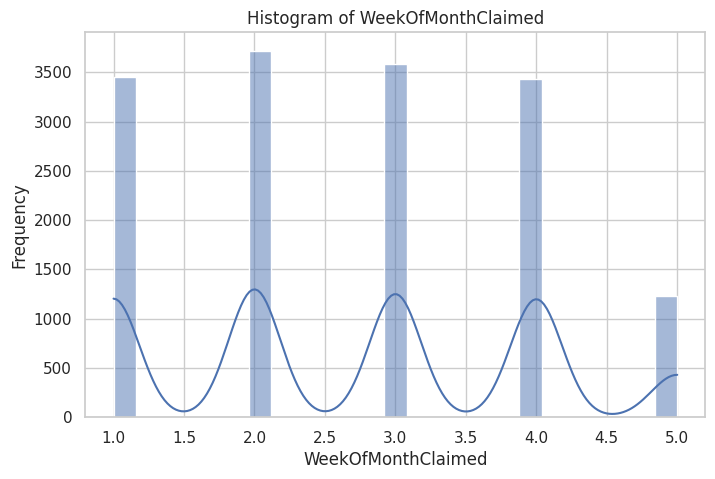

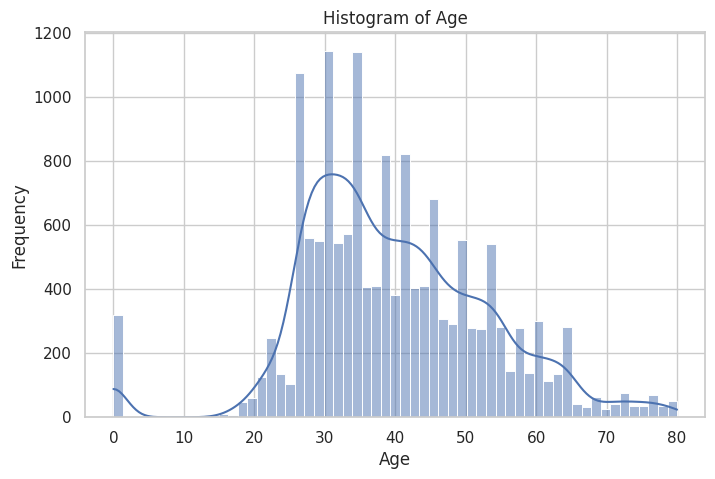

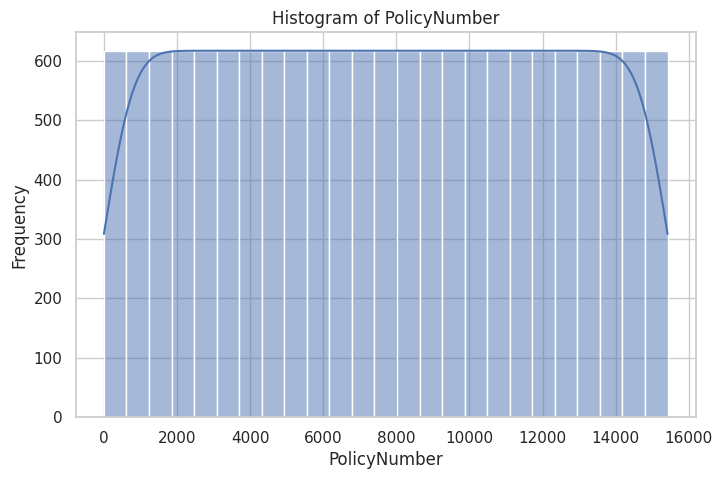

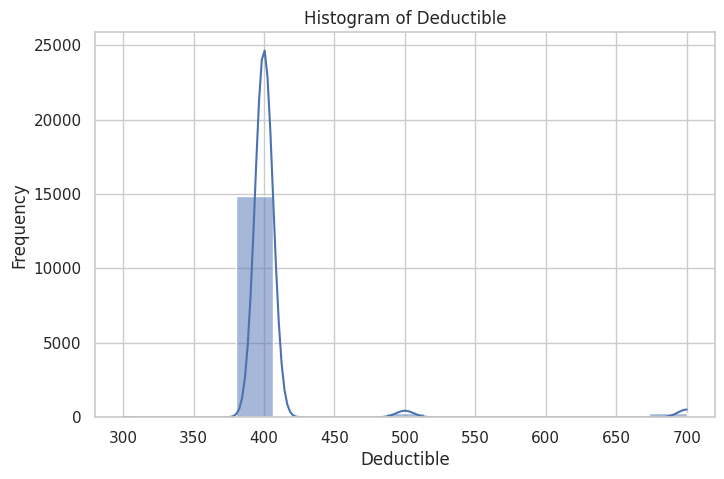

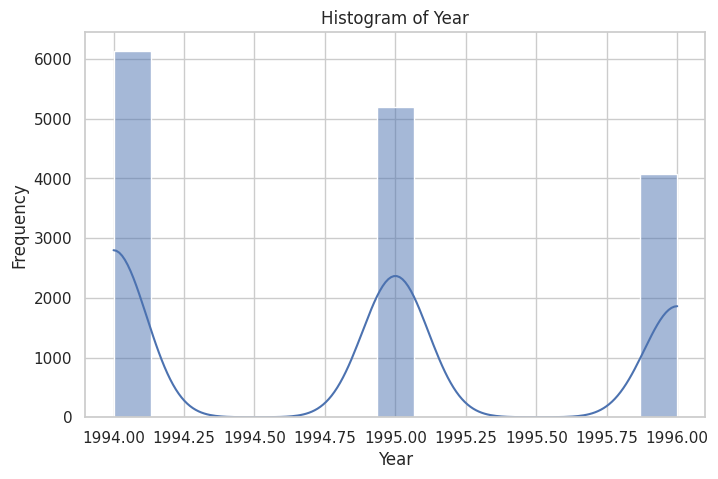

In [18]:
# 3.2 Histograms for each numerical variable
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    # - These histograms help understand distributions, skewness, and possible outliers.

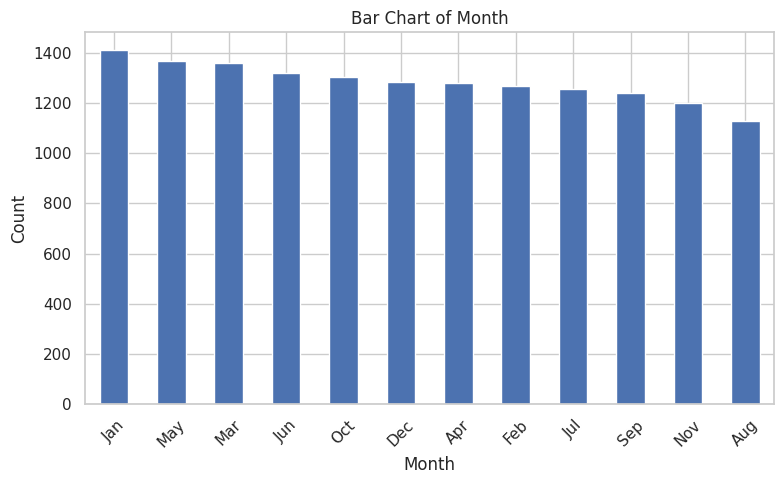

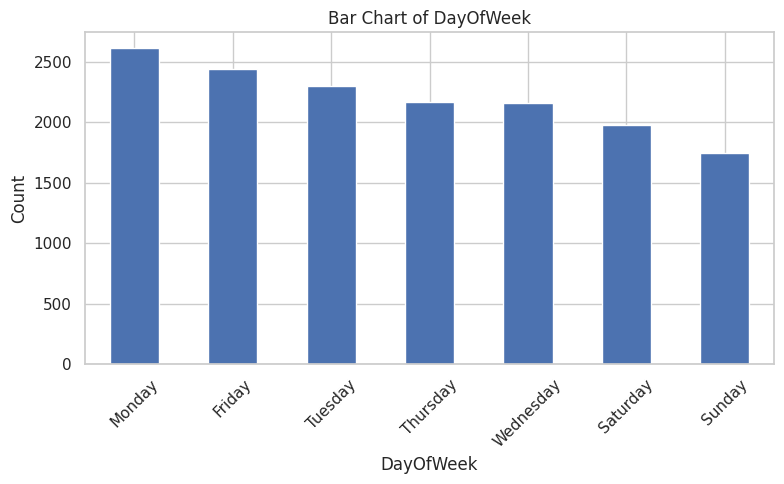

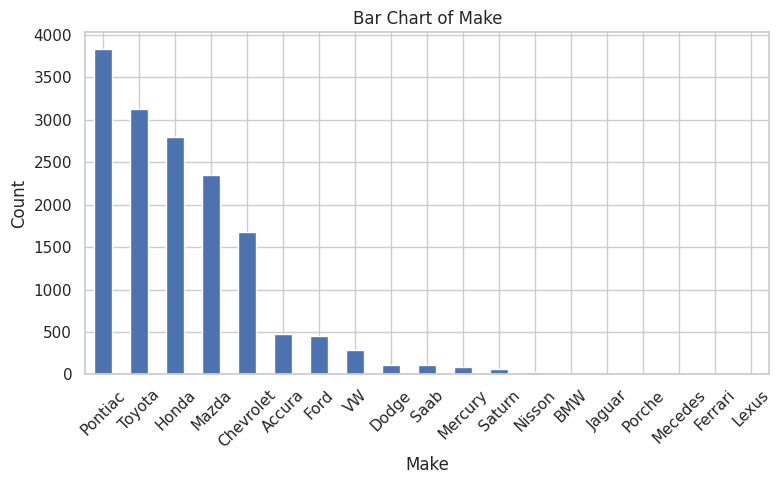

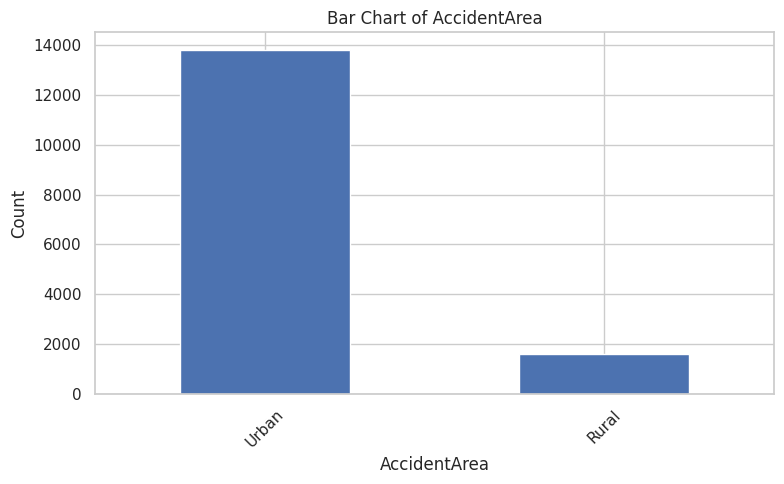

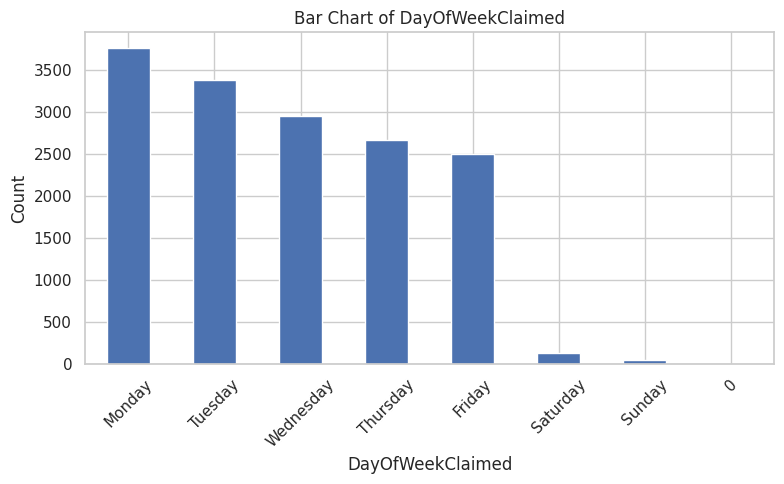

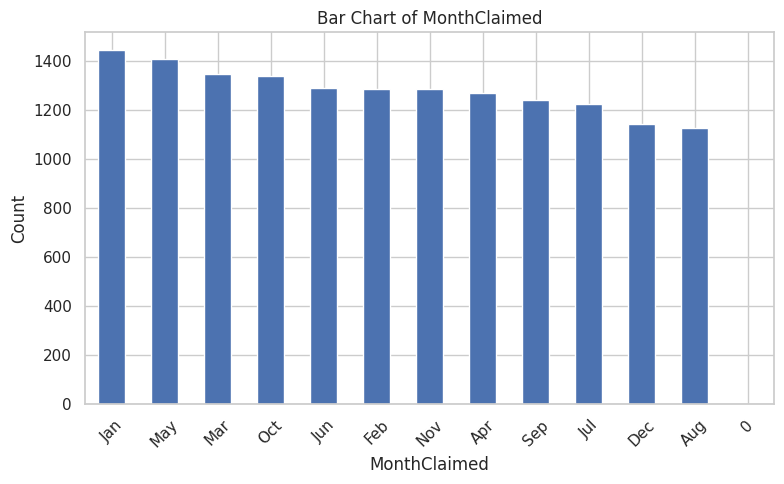

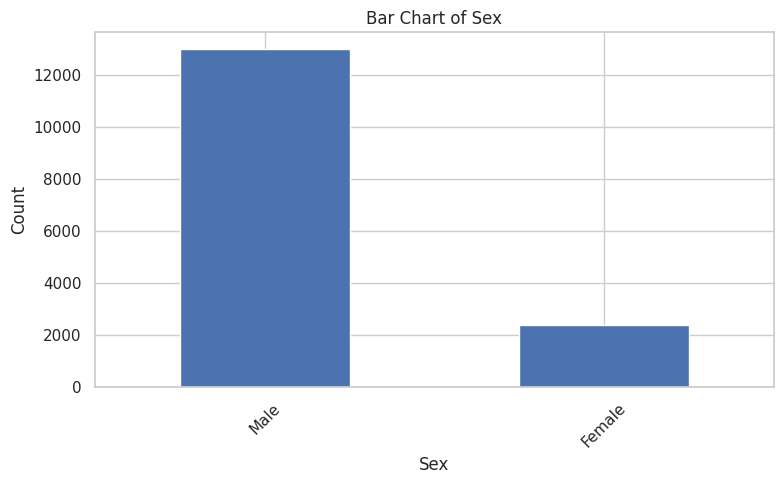

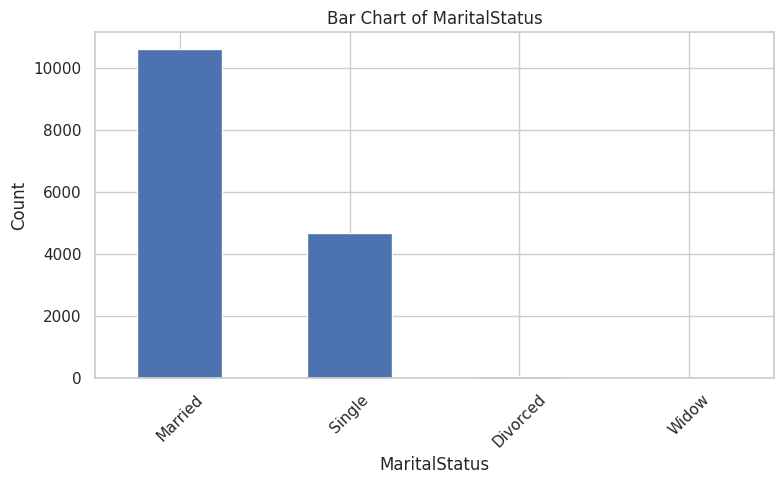

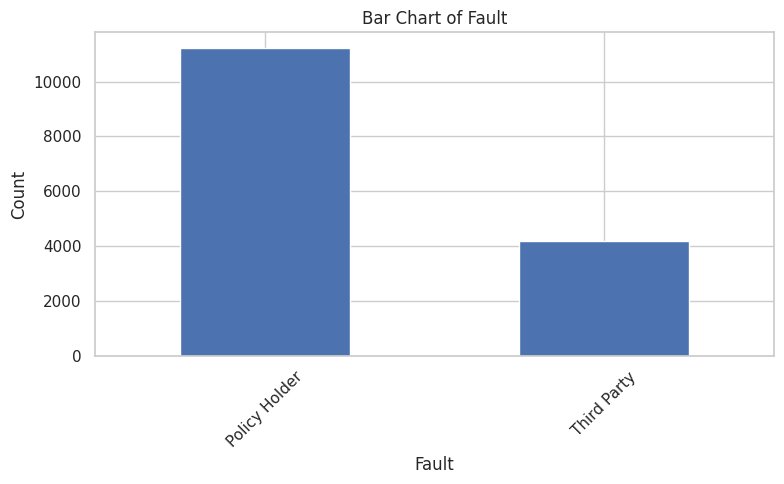

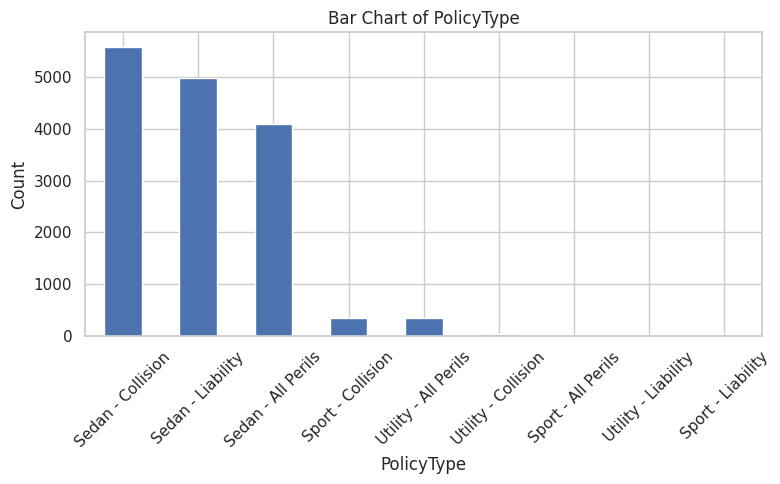

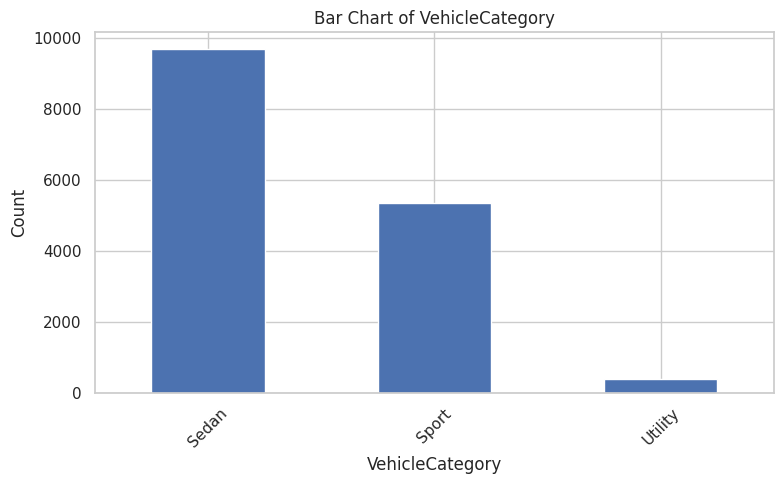

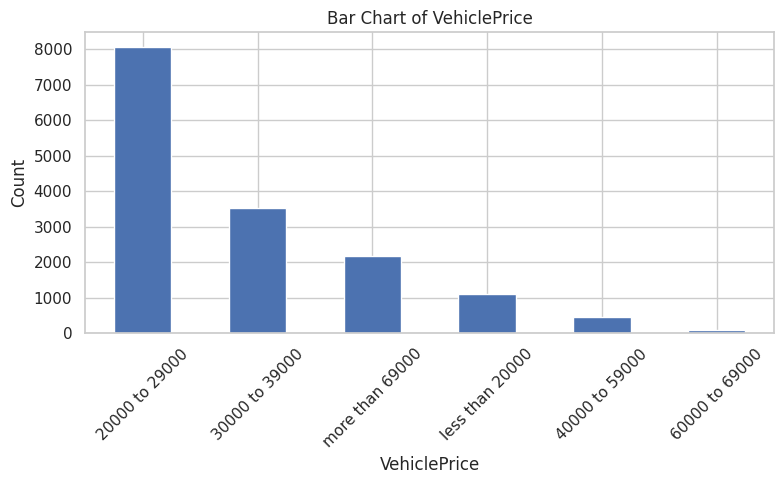

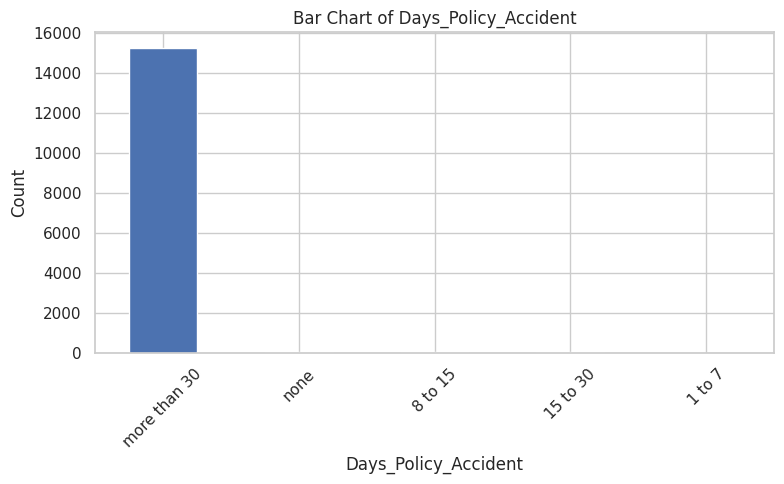

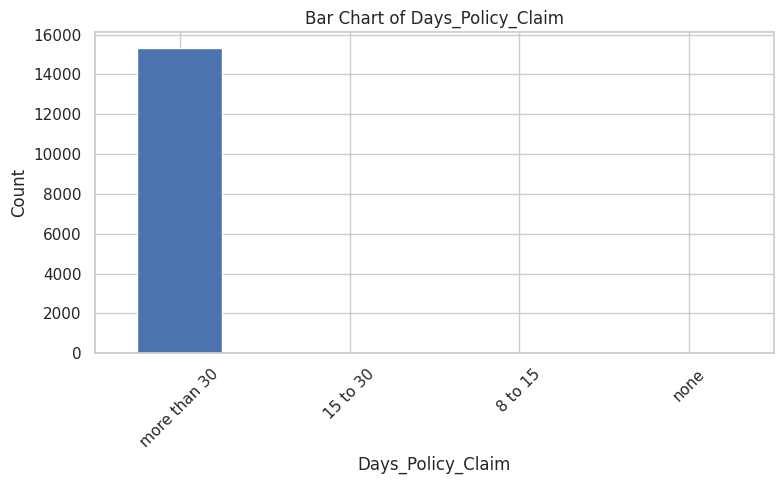

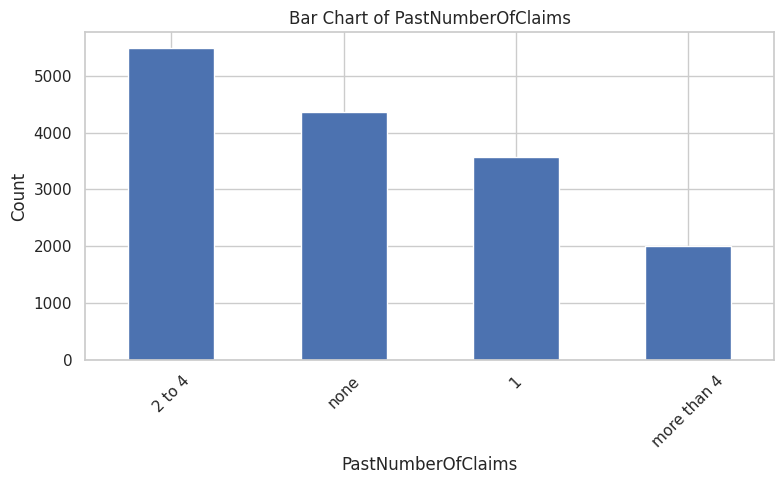

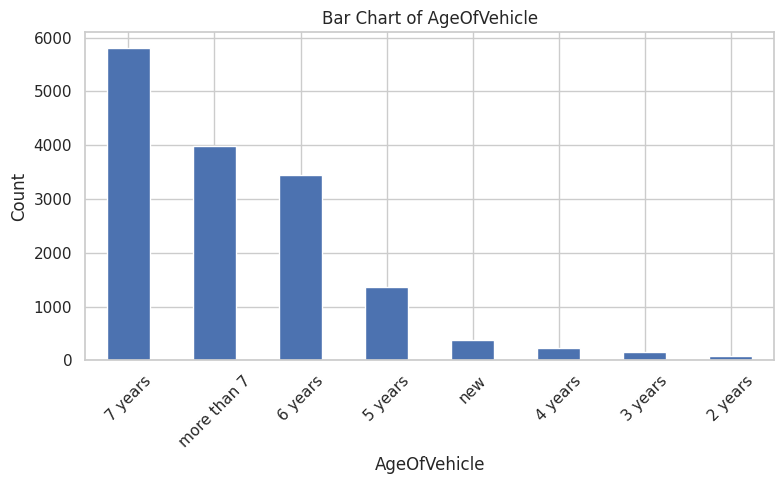

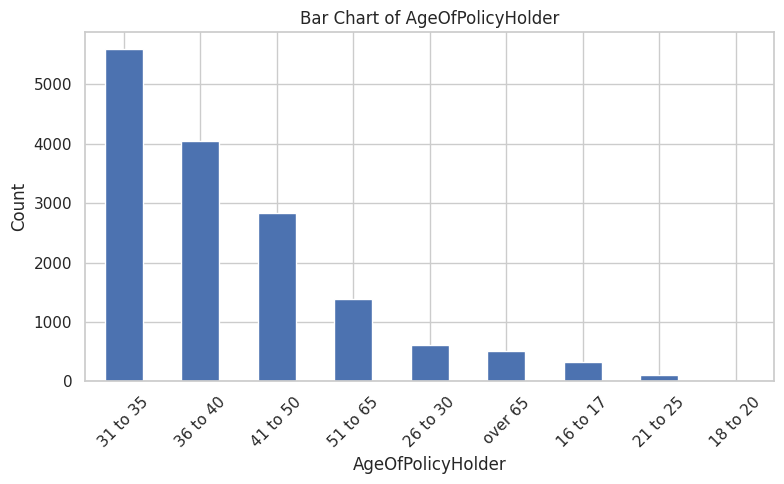

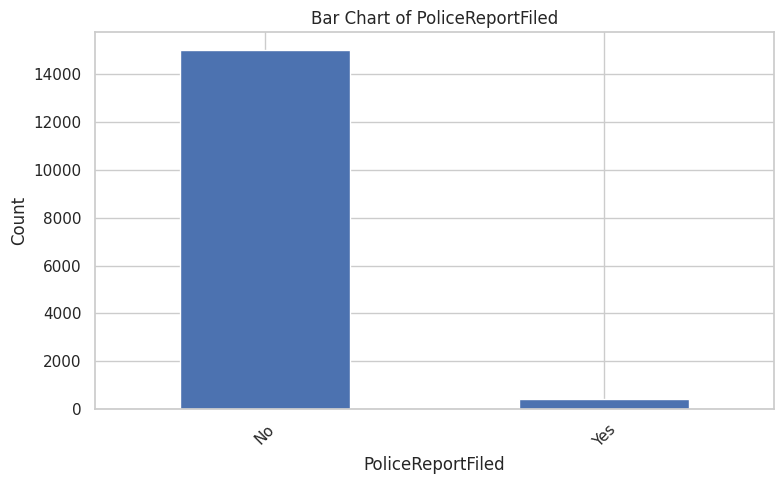

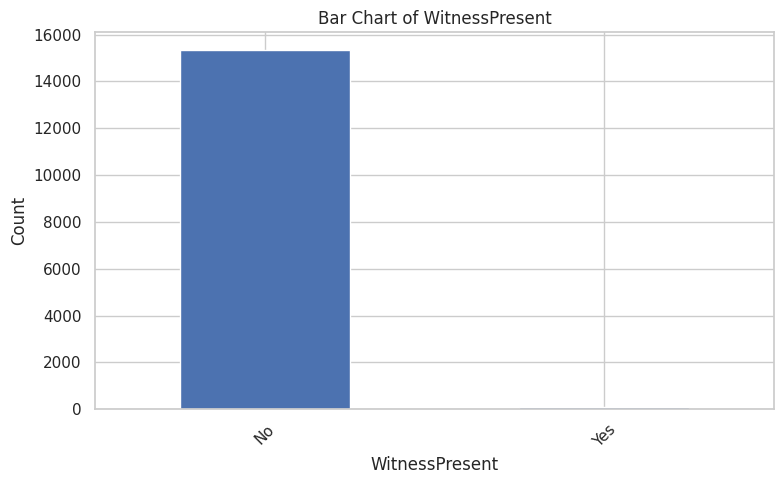

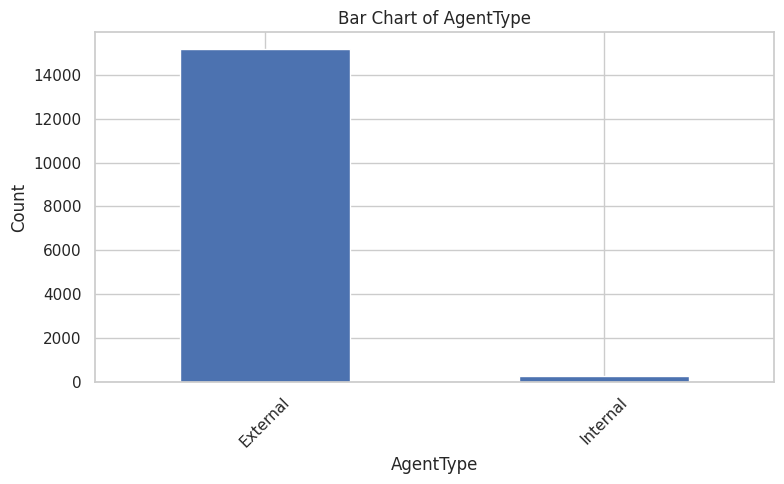

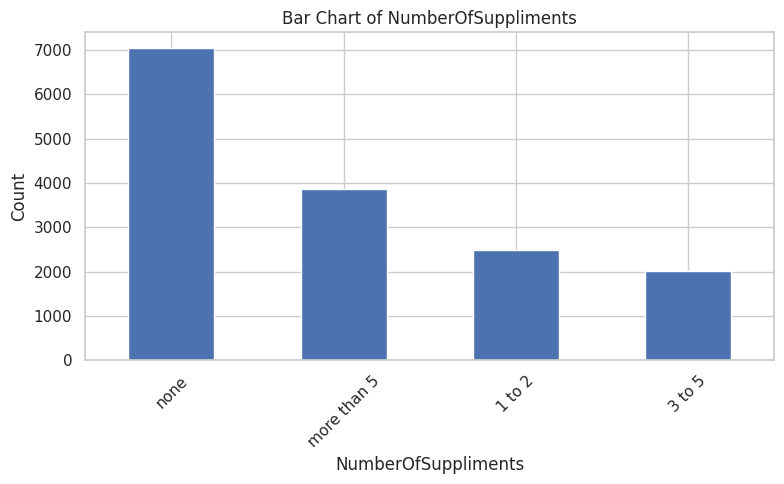

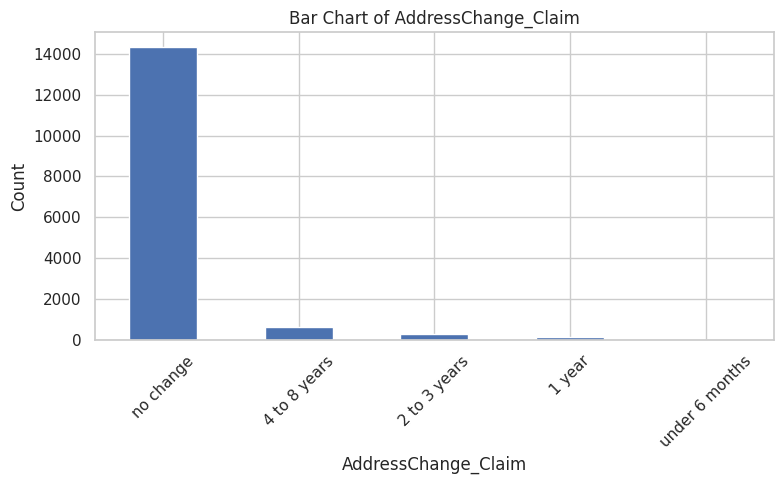

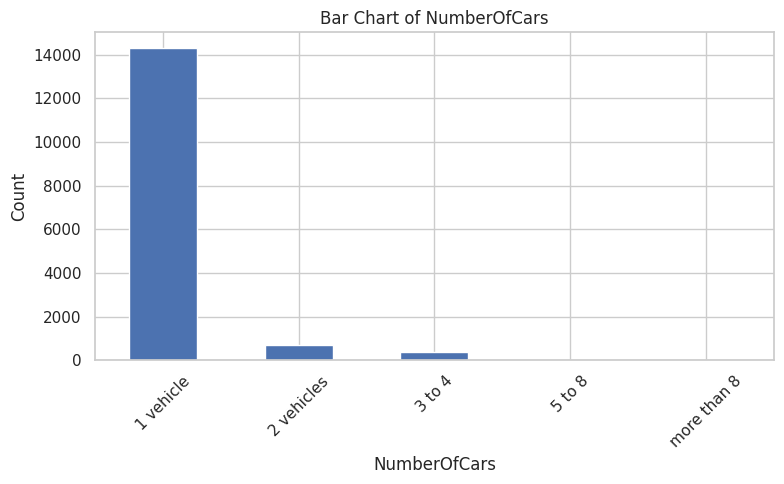

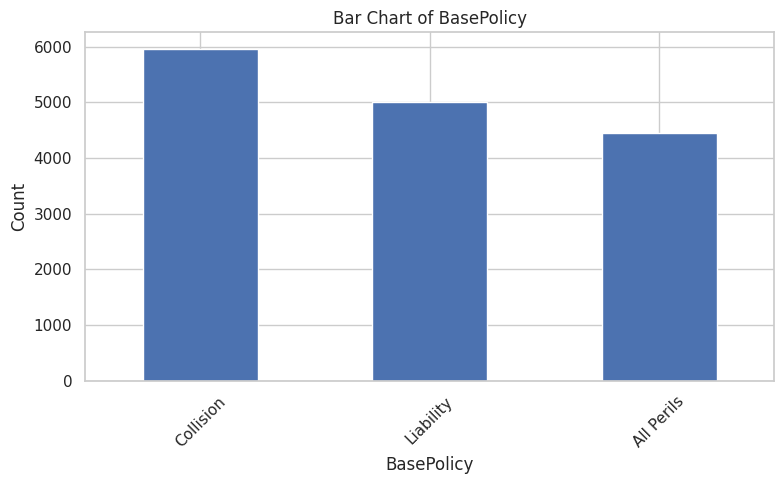

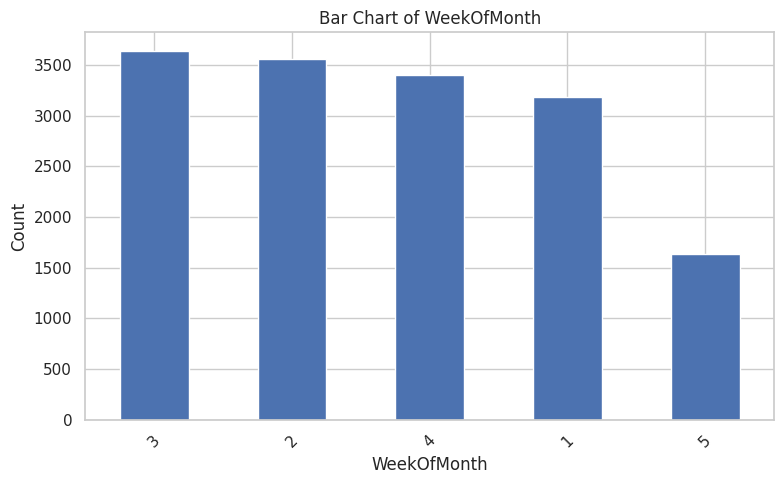

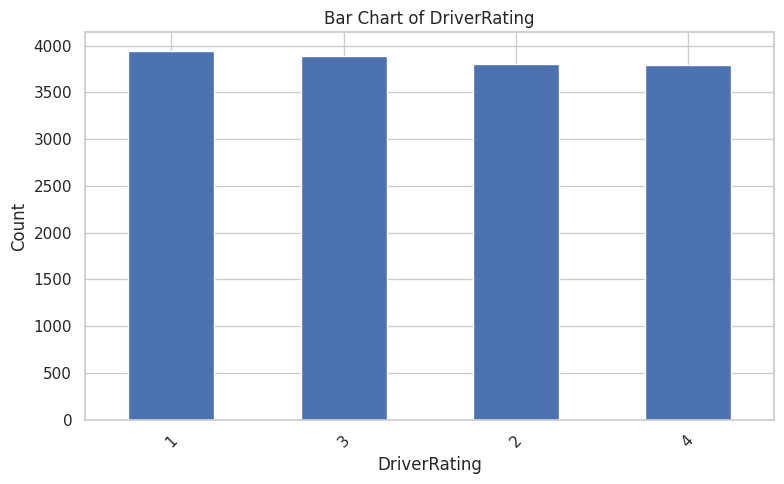

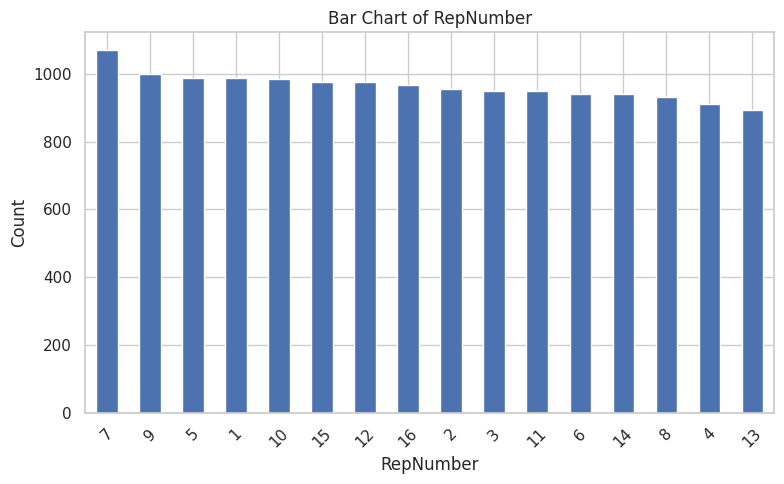

In [19]:
# 3.3 Bar charts for each categorical variable
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # - These show distribution of categories clearly.

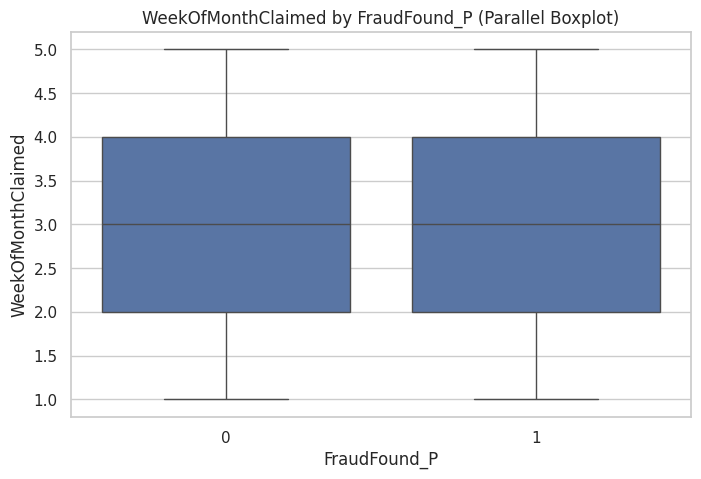

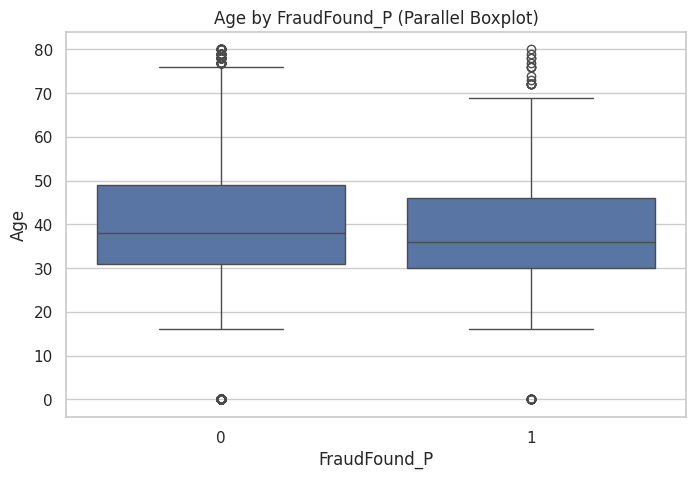

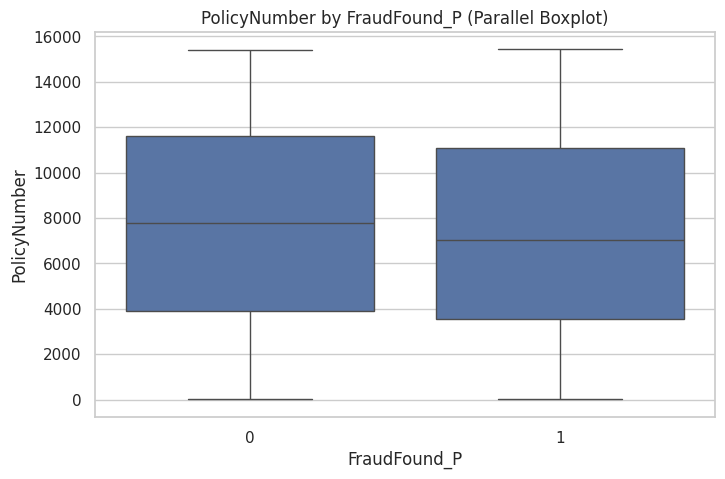

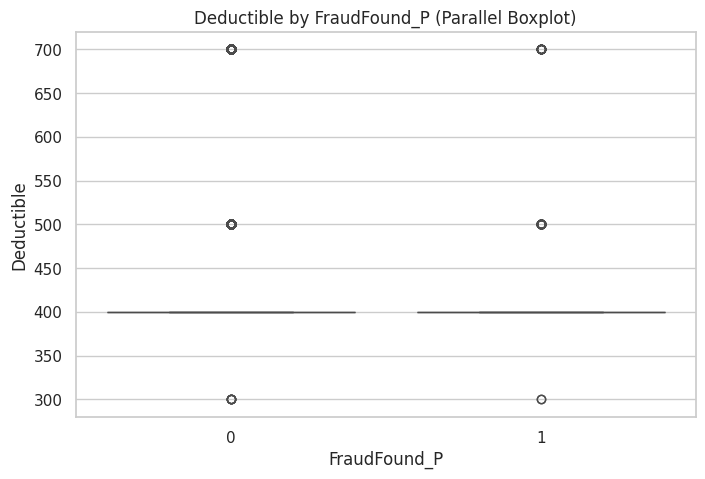

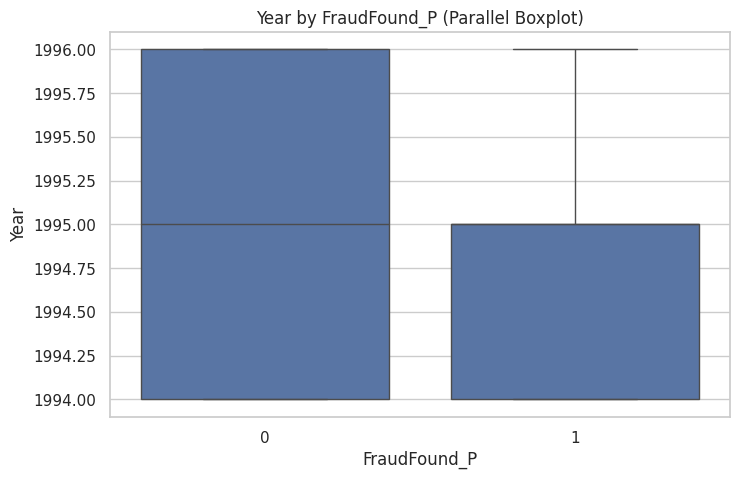

In [21]:
#BIVARIATE ANALYSIS

# 4.1 Parallel boxplots for numeric variables vs target
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=y, y=df[col])
    plt.title(f"{col} by FraudFound_P (Parallel Boxplot)")
    plt.xlabel("FraudFound_P")
    plt.ylabel(col)
    plt.show()

# - These show how the distribution of each numeric variable differs between fraud and non-fraud.

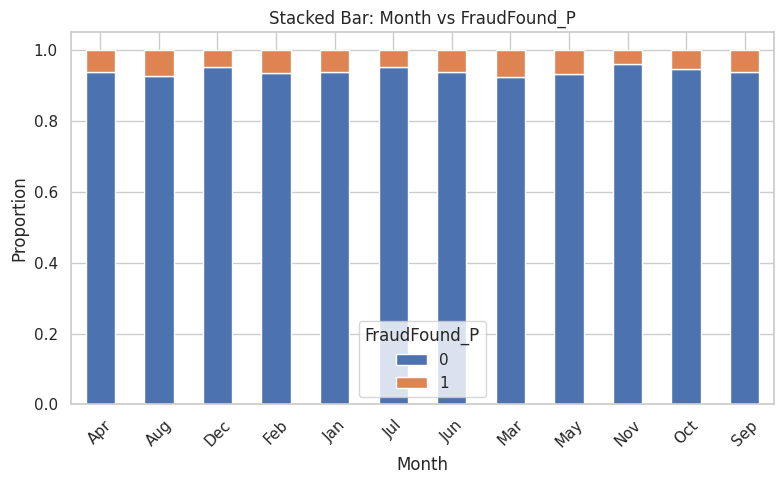

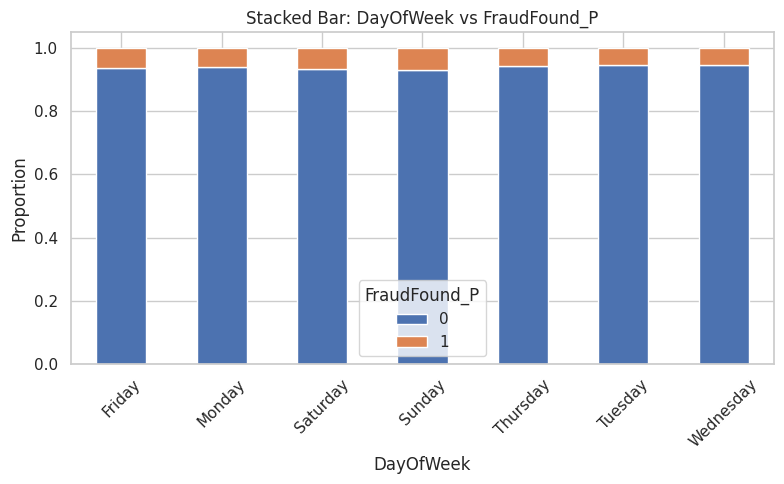

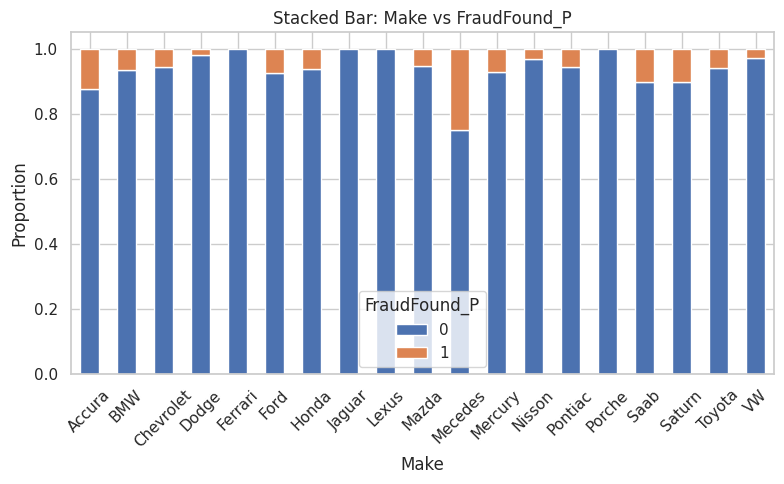

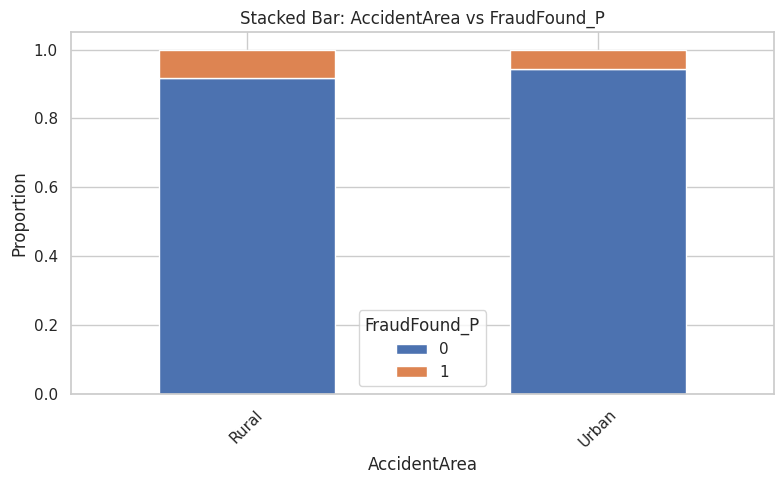

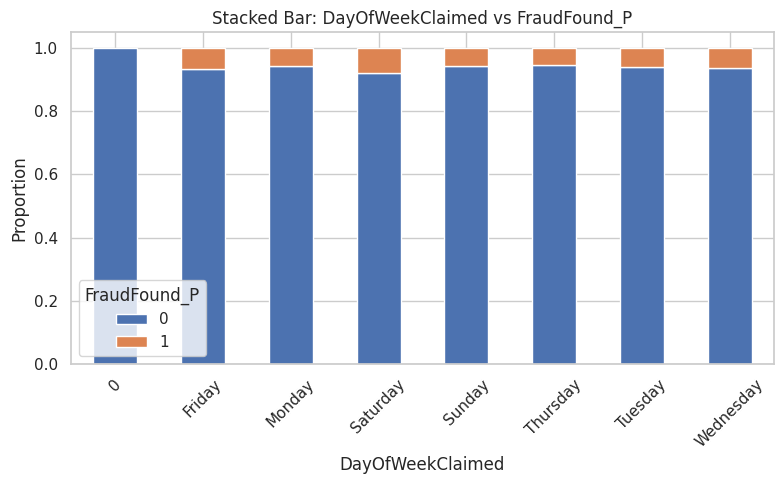

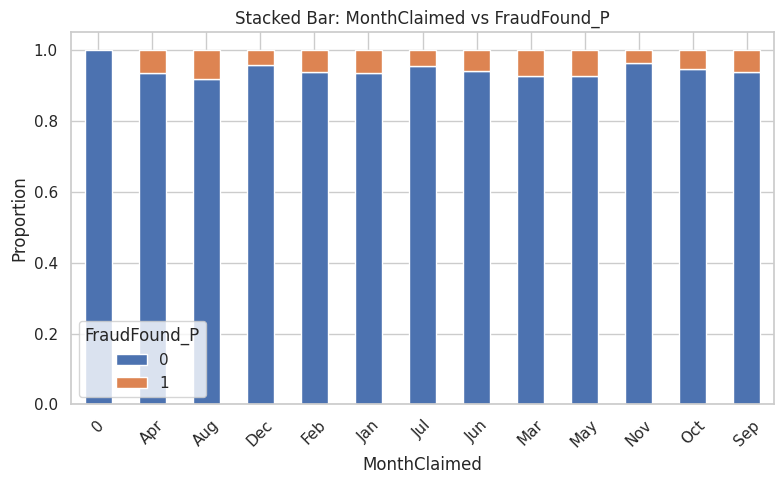

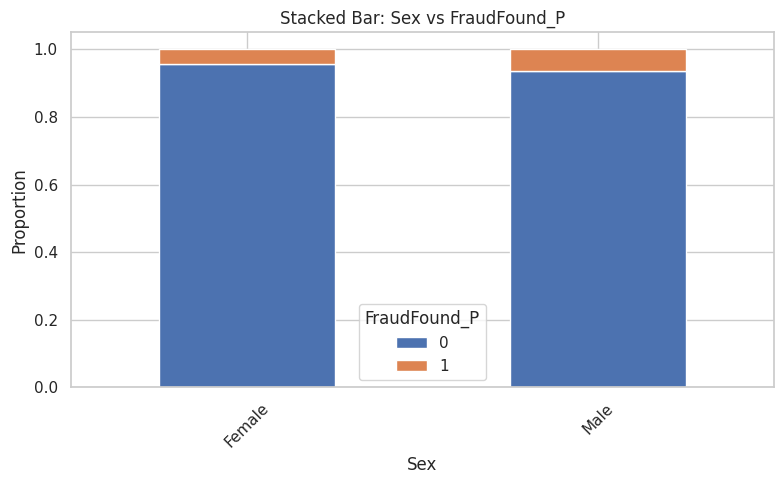

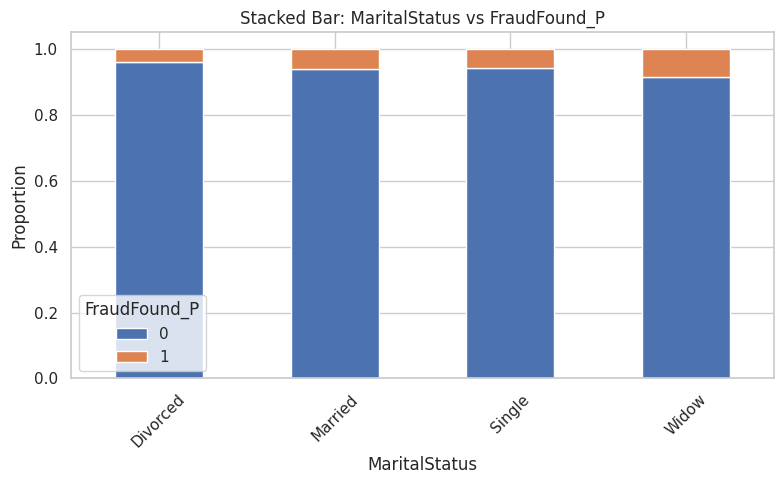

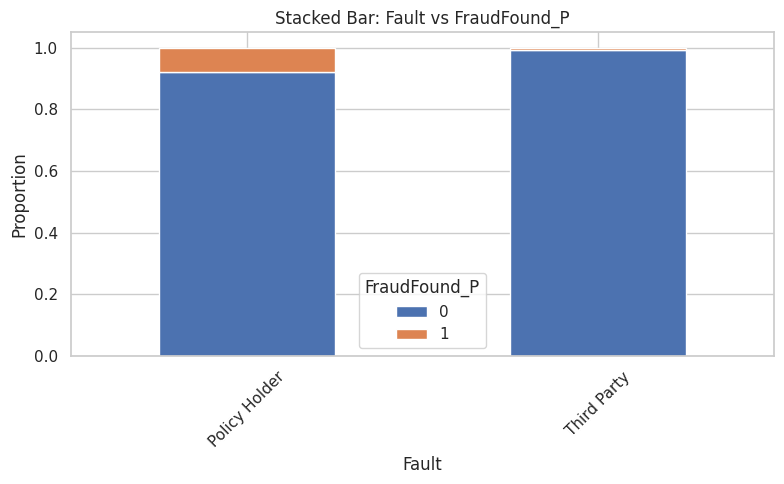

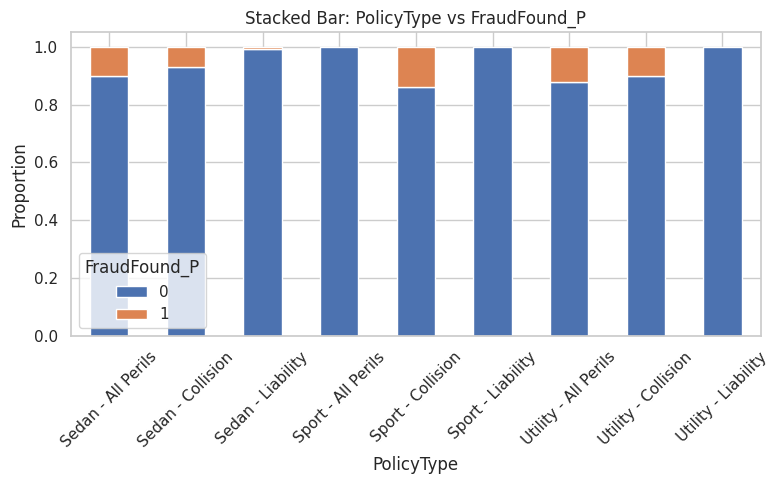

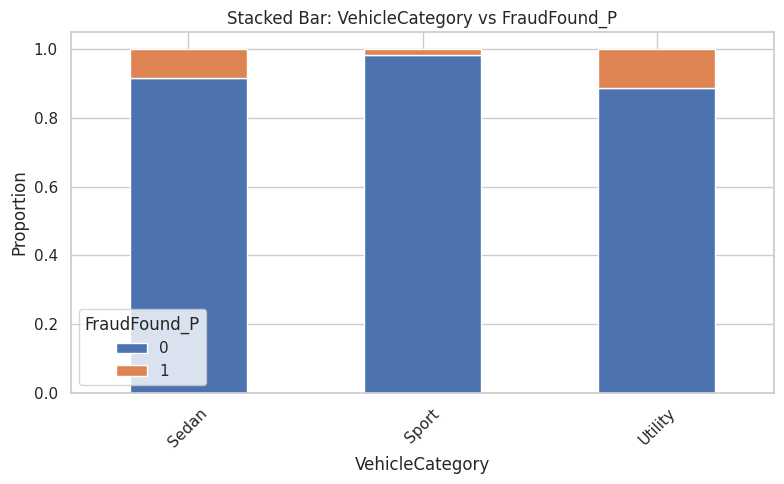

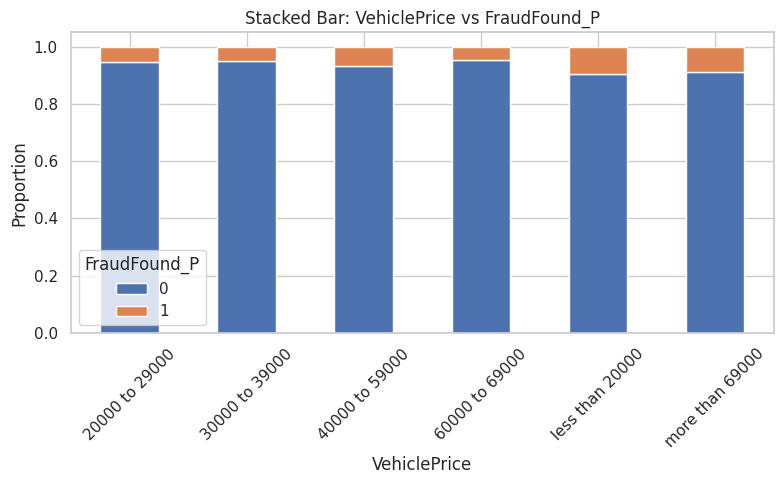

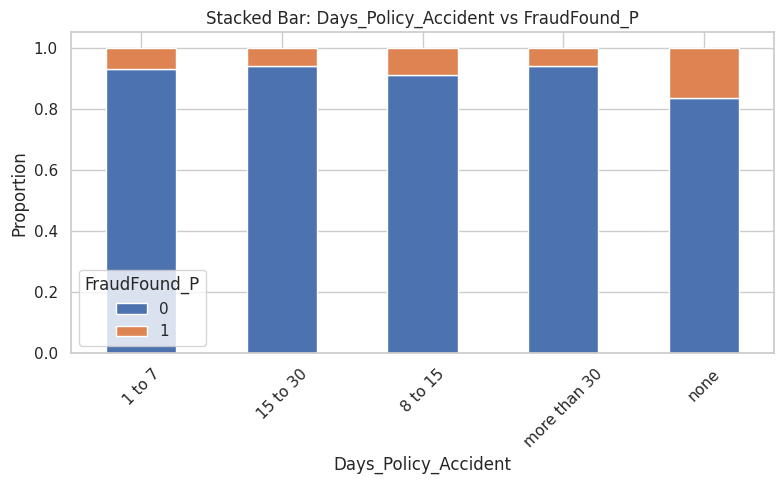

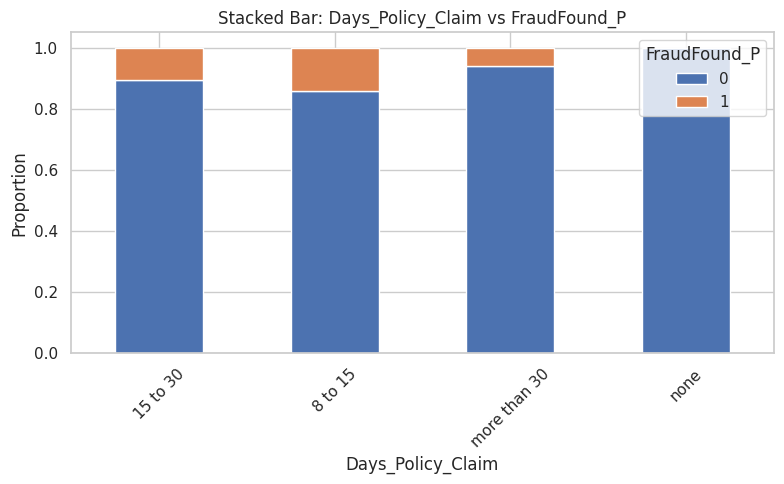

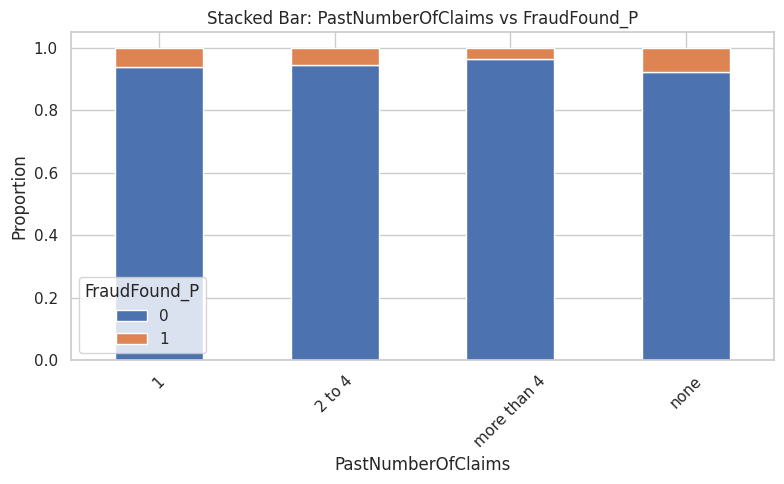

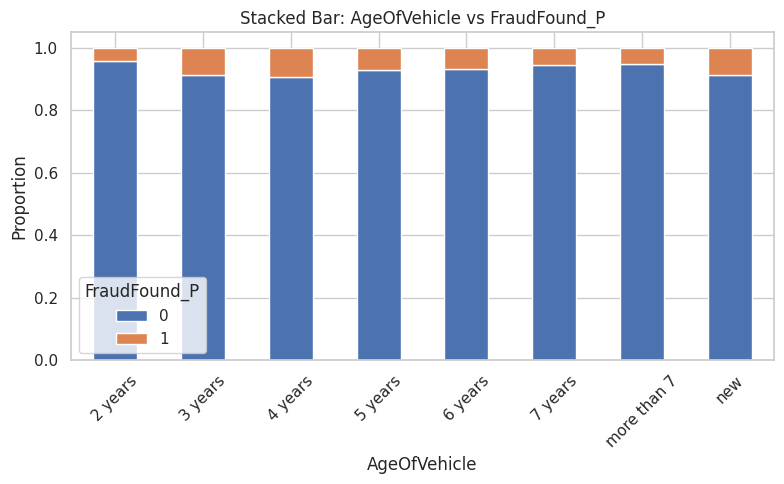

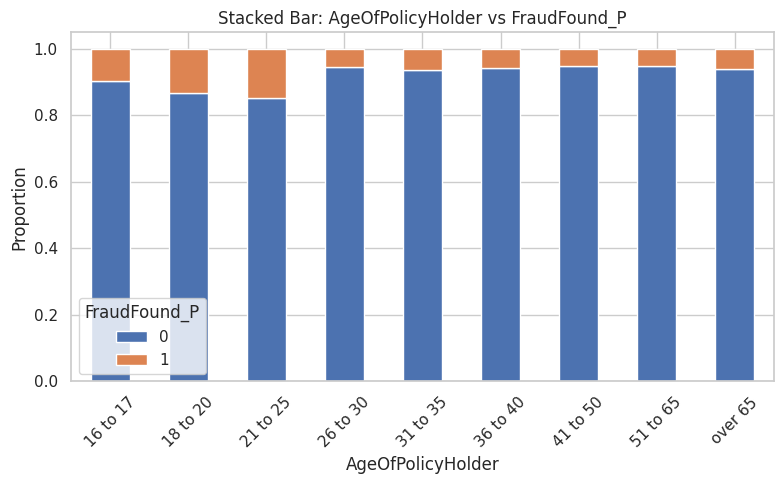

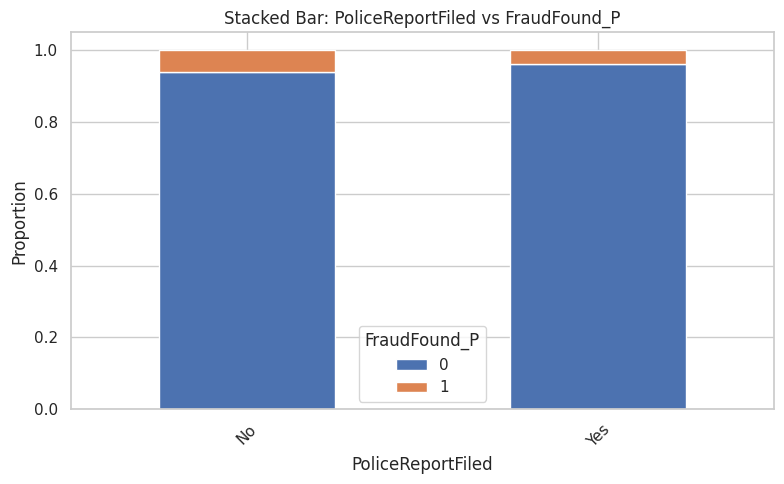

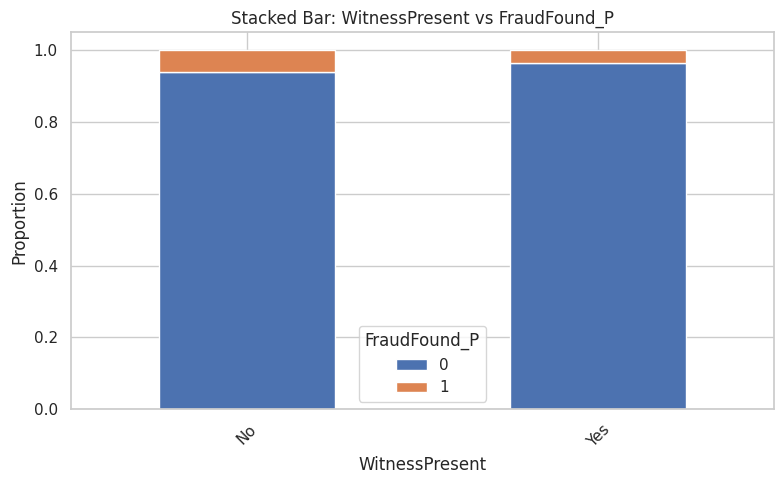

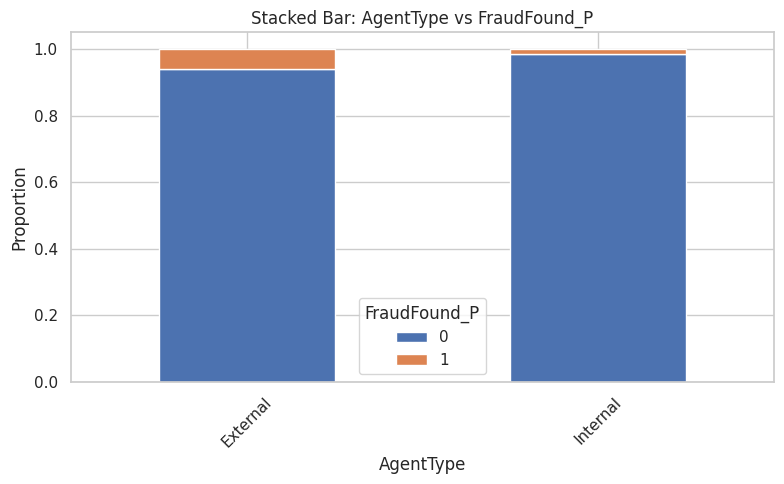

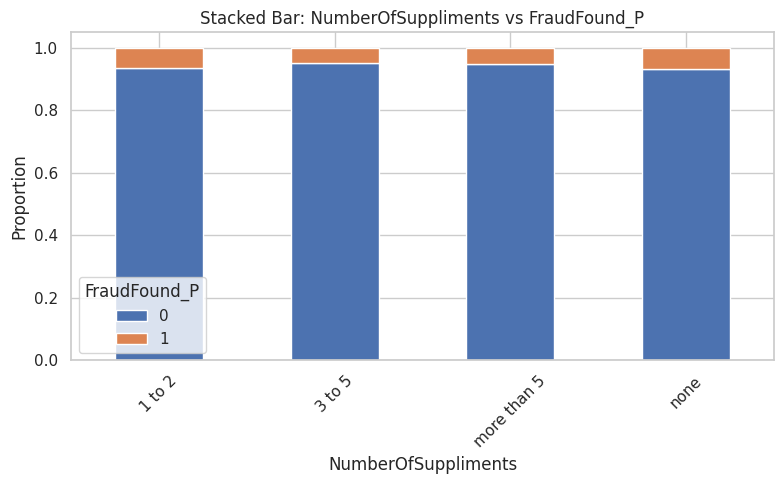

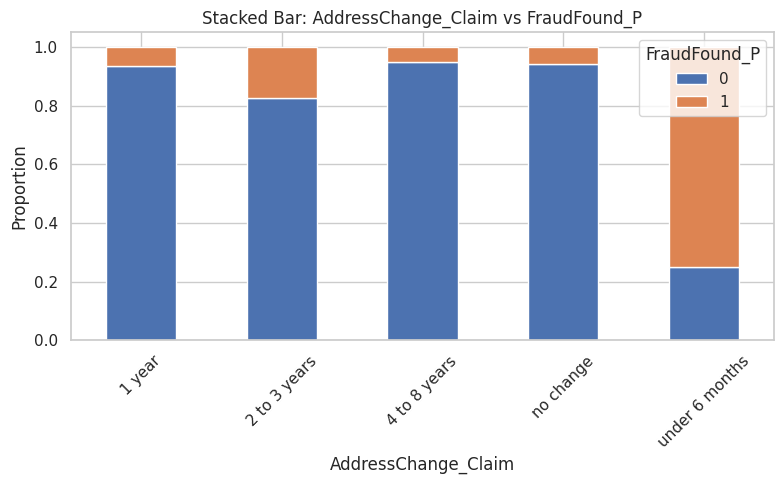

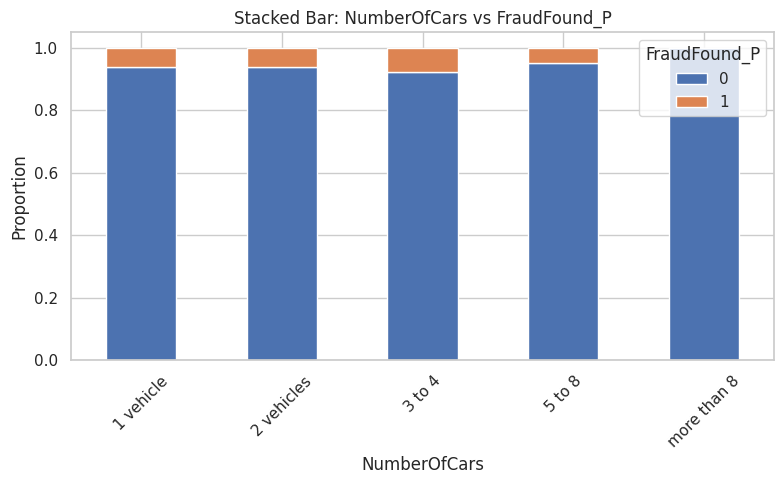

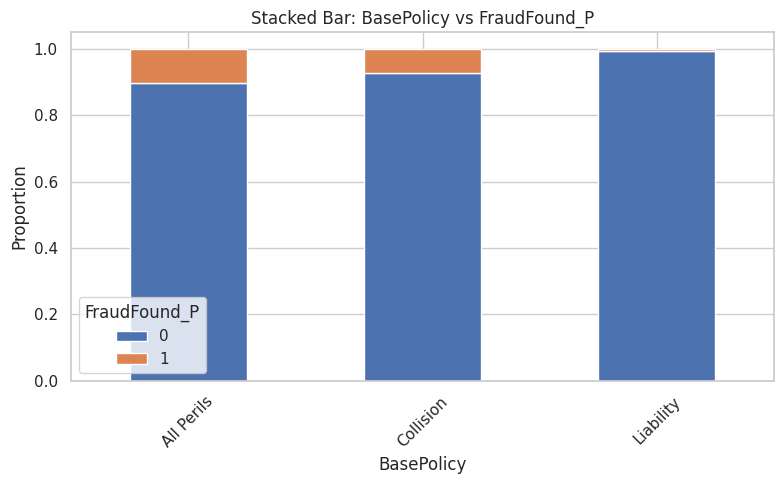

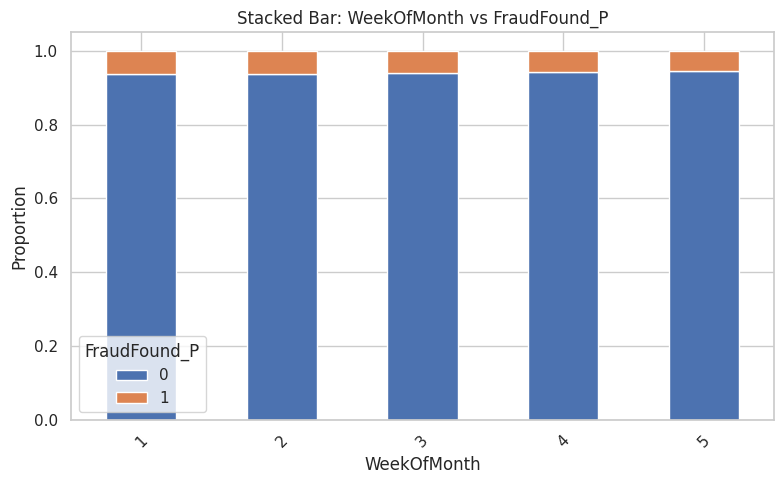

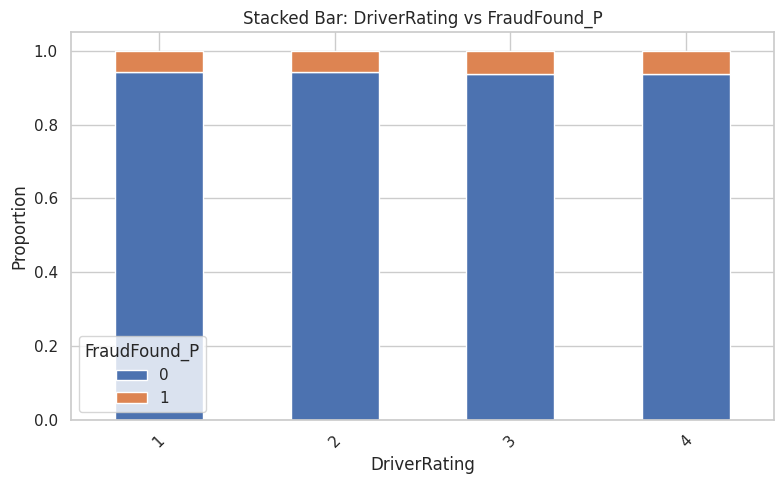

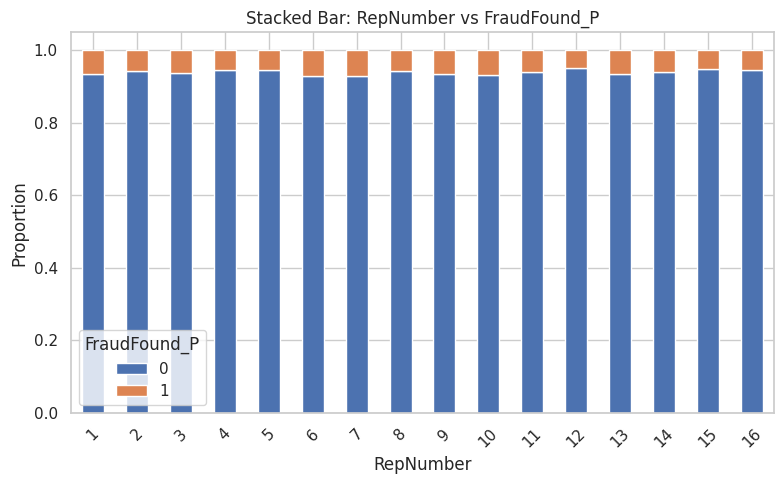

In [22]:
# 4.2 Stacked bar charts for categorical variables vs target
for col in categorical_cols:
    # Create a normalized crosstab
    ctab = pd.crosstab(df[col], y, normalize="index")

    ctab.plot(kind="bar", stacked=True)
    plt.title(f"Stacked Bar: {col} vs FraudFound_P")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.legend(title="FraudFound_P")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# - These stacked bars show how the fraud rate changes across categories.

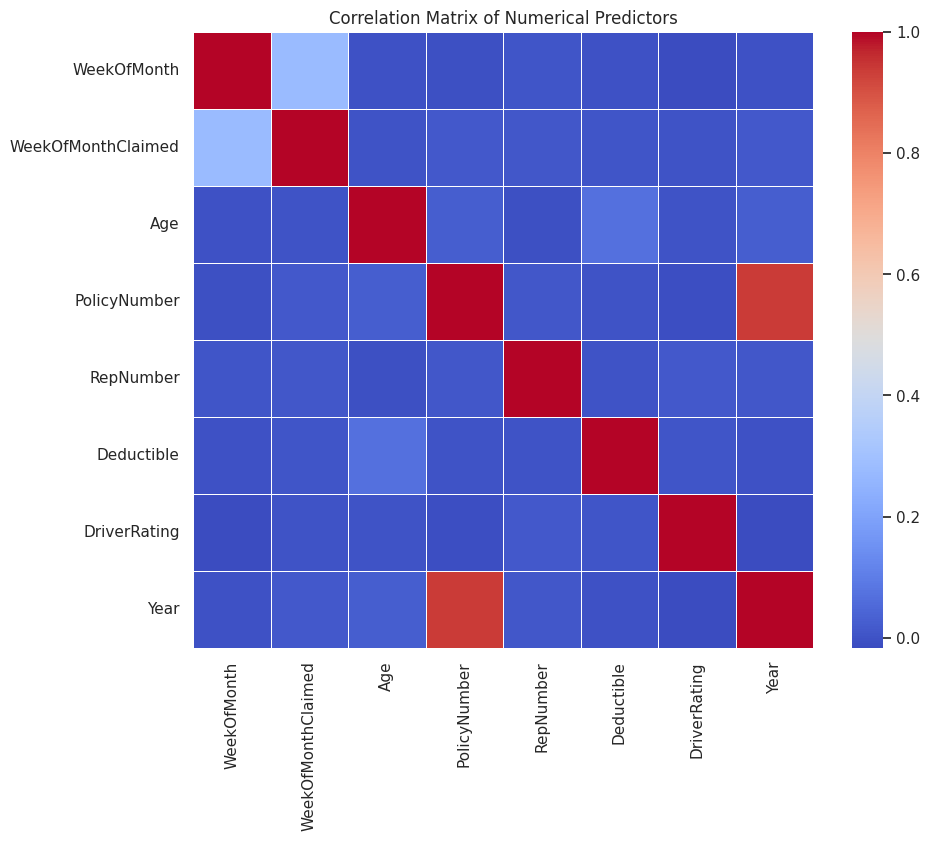

In [23]:
#CORRELATION MATRIX FOR NUMERICAL PREDICTORS

# Re-separate X and y using cleaned df
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify numeric predictors only (not including the target)
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

corr_matrix = X[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Predictors")
plt.show()



In [24]:
#PREPROCESSING FOR MODELING (EDA 2)


# 7.1 Re-define X and y to ensure consistency
X = df.drop(columns=[target_col])
y = df[target_col]

# 7.2 Identify categorical and numeric predictors again after all cleaning
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Final numeric columns:", numeric_cols)
print("Final categorical columns:", categorical_cols)

Final numeric columns: ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']
Final categorical columns: ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [25]:
# 7.3 Convert binary categorical variables to 0/1 where possible
#    We detect them automatically as columns with exactly 2 unique categories.
binary_cat_cols = [col for col in categorical_cols if df[col].nunique() == 2]
print("Binary categorical columns (to map to 0/1):", binary_cat_cols)

# Example mapping: we map the second sorted category to 1 and the first to 0 for simplicity.
for col in binary_cat_cols:
    categories = sorted(df[col].unique())
    mapping = {categories[0]: 0, categories[1]: 1}
    df[col] = df[col].map(mapping)
    print(f"Mapping for {col}:", mapping)

Binary categorical columns (to map to 0/1): ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']
Mapping for AccidentArea: {'Rural': 0, 'Urban': 1}
Mapping for Sex: {'Female': 0, 'Male': 1}
Mapping for Fault: {'Policy Holder': 0, 'Third Party': 1}
Mapping for PoliceReportFiled: {'No': 0, 'Yes': 1}
Mapping for WitnessPresent: {'No': 0, 'Yes': 1}
Mapping for AgentType: {'External': 0, 'Internal': 1}


In [26]:
# Update types: now those mapped columns become numeric
X = df.drop(columns=[target_col])
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("\nNumeric columns after binary mapping:", numeric_cols)
print("Remaining categorical columns:", categorical_cols)


Numeric columns after binary mapping: ['WeekOfMonth', 'AccidentArea', 'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'Year']
Remaining categorical columns: ['Month', 'DayOfWeek', 'Make', 'DayOfWeekClaimed', 'MonthClaimed', 'MaritalStatus', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [27]:
# 7.4 One-hot encode nominal categorical variables with more than 2 categories
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Shape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)

Shape before encoding: (15420, 32)
Shape after encoding: (15420, 124)


In [28]:
# 7.5 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (12336, 124)
Test set shape: (3084, 124)


In [29]:
# 7.6 Handle class imbalance using SMOTE (on training data only)
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution before SMOTE:
FraudFound_P
0    11598
1      738
Name: count, dtype: int64

Class distribution after SMOTE:
FraudFound_P
0    11598
1    11598
Name: count, dtype: int64


In [30]:
# 7.7 Scale features (optional but good practice for logistic regression / KNN / SVM)
scaler = StandardScaler()

# Fit on SMOTE data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Convert back to DataFrame for easier feature importance analysis
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

feature_names = X_train_scaled.columns.tolist()

In [32]:
#METRICS FUNCTION & HELPER PLOTS

def metrics_score(y_true, y_pred, y_proba=None):
    """
    Custom function to print classification metrics.
    Optionally includes ROC-AUC if predicted probabilities are provided.
    """
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall   :", round(recall_score(y_true, y_pred), 4))
    print("F1-score :", round(f1_score(y_true, y_pred), 4))

    if y_proba is not None:
        try:
            auc = roc_auc_score(y_true, y_proba)
            print("ROC-AUC  :", round(auc, 4))
        except:
            print("ROC-AUC  : Could not be computed (check probabilities).")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))


def plot_roc_curve(y_true, y_proba, model_name="Model"):
    """
    Helper to plot ROC curve.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_true, y_proba):.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()

In [33]:
#MODEL 1 - LOGISTIC REGRESSION

# Instantiate the model
log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)

In [34]:
# Fit the model on SMOTE + scaled training data
log_reg.fit(X_train_scaled, y_train_smote)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [35]:
# Predictions on train and test
y_train_pred_lr = log_reg.predict(X_train_scaled)
y_test_pred_lr = log_reg.predict(X_test_scaled)

In [37]:
# Predicted probabilities for ROC-AUC
y_train_proba_lr = log_reg.predict_proba(X_train_scaled)[:, 1]
y_test_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression Performance on Training Data ===")
metrics_score(y_train_smote, y_train_pred_lr, y_train_proba_lr)

print("\n=== Logistic Regression Performance on Test Data ===")
metrics_score(y_test, y_test_pred_lr, y_test_proba_lr)

=== Logistic Regression Performance on Training Data ===
Accuracy : 0.9665
Precision: 0.9955
Recall   : 0.9372
F1-score : 0.9655
ROC-AUC  : 0.9884

Confusion Matrix:
[[11549    49]
 [  728 10870]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11598
           1       1.00      0.94      0.97     11598

    accuracy                           0.97     23196
   macro avg       0.97      0.97      0.97     23196
weighted avg       0.97      0.97      0.97     23196


=== Logistic Regression Performance on Test Data ===
Accuracy : 0.9358
Precision: 0.0667
Recall   : 0.0054
F1-score : 0.01
ROC-AUC  : 0.7983

Confusion Matrix:
[[2885   14]
 [ 184    1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.07      0.01      0.01       185

    accuracy                           0.94      3084
   macro avg       0.5

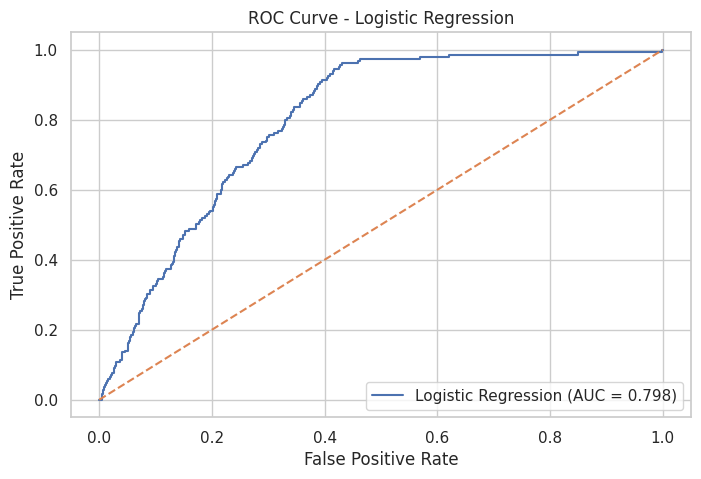

In [38]:
# ROC curve on test data
plot_roc_curve(y_test, y_test_proba_lr, model_name="Logistic Regression")

In [39]:
# Cross-validation (5-fold) to check stability
cv_scores_lr = cross_val_score(log_reg, X_train_scaled, y_train_smote, cv=5, scoring="roc_auc")
print("Logistic Regression 5-fold CV ROC-AUC:", cv_scores_lr)
print("Mean CV ROC-AUC:", cv_scores_lr.mean().round(4))

Logistic Regression 5-fold CV ROC-AUC: [0.90057279 0.99993532 0.99996227 0.99997584 0.99994703]
Mean CV ROC-AUC: 0.9801


In [40]:
# 9.1 Feature importance from logistic regression (absolute coefficient values)
coef = log_reg.coef_[0]
feature_importance_lr = pd.Series(np.abs(coef), index=feature_names).sort_values(ascending=False)

print("\nTop 15 features (by absolute coefficient magnitude) for Logistic Regression:")
print(feature_importance_lr.head(15))


Top 15 features (by absolute coefficient magnitude) for Logistic Regression:
DayOfWeekClaimed_Monday       2.103357
DayOfWeekClaimed_Tuesday      1.991834
DayOfWeekClaimed_Wednesday    1.861318
AgeOfPolicyHolder_31 to 35    1.843804
DayOfWeekClaimed_Thursday     1.759079
DayOfWeekClaimed_Friday       1.698484
AgeOfPolicyHolder_36 to 40    1.646292
AgeOfPolicyHolder_41 to 50    1.441714
AgeOfVehicle_7 years          1.156051
AgeOfPolicyHolder_51 to 65    1.035741
AgeOfVehicle_more than 7      1.033142
Fault                         0.949409
AgeOfVehicle_6 years          0.902857
MonthClaimed_Mar              0.869261
MonthClaimed_Jan              0.840969
dtype: float64


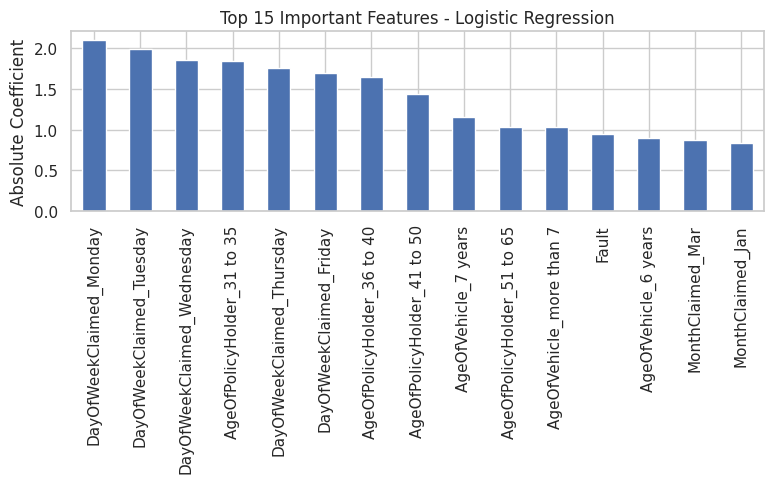

In [41]:
# Bar plot of top 15 features
feature_importance_lr.head(15).plot(kind="bar")
plt.title("Top 15 Important Features - Logistic Regression")
plt.ylabel("Absolute Coefficient")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [42]:
#MODEL 2 - DECISION TREE CLASSIFIER

dtree = DecisionTreeClassifier(
    max_depth=6,       # you can tune this
    min_samples_split=50,
    random_state=42
)

dtree.fit(X_train_scaled, y_train_smote)

y_train_pred_dt = dtree.predict(X_train_scaled)
y_test_pred_dt = dtree.predict(X_test_scaled)

=== Decision Tree Performance on Training Data ===
Accuracy : 0.8736
Precision: 0.8465
Recall   : 0.9127
F1-score : 0.8784
ROC-AUC  : 0.9439

Confusion Matrix:
[[ 9679  1919]
 [ 1012 10586]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87     11598
           1       0.85      0.91      0.88     11598

    accuracy                           0.87     23196
   macro avg       0.88      0.87      0.87     23196
weighted avg       0.88      0.87      0.87     23196


=== Decision Tree Performance on Test Data ===
Accuracy : 0.8165
Precision: 0.1687
Recall   : 0.5243
F1-score : 0.2553
ROC-AUC  : 0.805

Confusion Matrix:
[[2421  478]
 [  88   97]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2899
           1       0.17      0.52      0.26       185

    accuracy                           0.82      3084
   macro avg       0.57      0.68

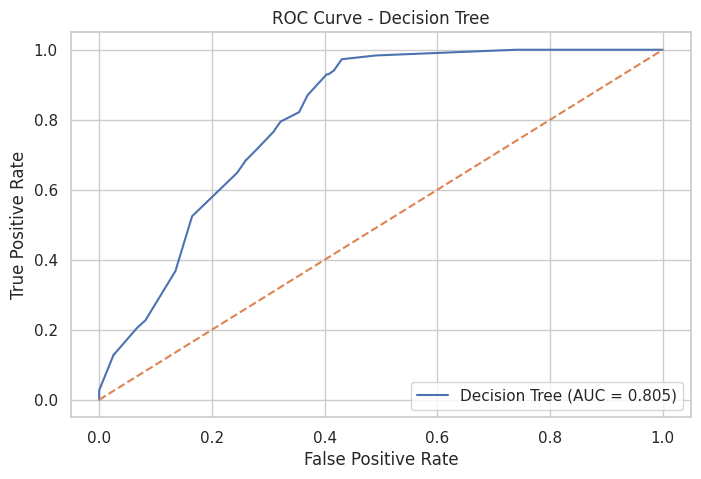

In [43]:
# For ROC, need probabilities
y_train_proba_dt = dtree.predict_proba(X_train_scaled)[:, 1]
y_test_proba_dt = dtree.predict_proba(X_test_scaled)[:, 1]

print("=== Decision Tree Performance on Training Data ===")
metrics_score(y_train_smote, y_train_pred_dt, y_train_proba_dt)

print("\n=== Decision Tree Performance on Test Data ===")
metrics_score(y_test, y_test_pred_dt, y_test_proba_dt)

plot_roc_curve(y_test, y_test_proba_dt, model_name="Decision Tree")


Top 15 features (Decision Tree feature_importances_):
BasePolicy_Liability                0.314900
Fault                               0.300574
PolicyType_Sedan - Collision        0.147021
AgeOfVehicle_more than 7            0.047620
AgeOfVehicle_7 years                0.033833
NumberOfSuppliments_3 to 5          0.029990
AgeOfVehicle_6 years                0.026996
NumberOfSuppliments_none            0.021444
NumberOfSuppliments_more than 5     0.021253
VehiclePrice_less than 20000        0.010269
AgeOfPolicyHolder_51 to 65          0.010042
AddressChange_Claim_2 to 3 years    0.009784
MaritalStatus_Single                0.008253
AgeOfPolicyHolder_41 to 50          0.007920
Age                                 0.003222
dtype: float64


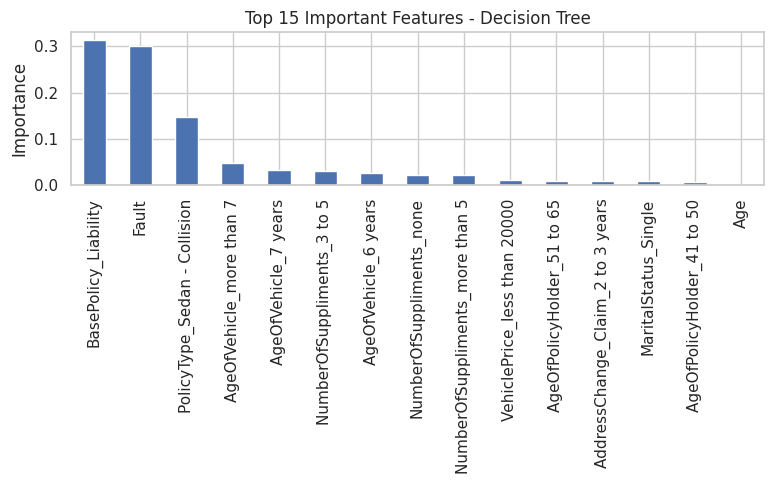

In [44]:
# Feature importance
feature_importance_dt = pd.Series(dtree.feature_importances_, index=feature_names).sort_values(ascending=False)

print("\nTop 15 features (Decision Tree feature_importances_):")
print(feature_importance_dt.head(15))

feature_importance_dt.head(15).plot(kind="bar")
plt.title("Top 15 Important Features - Decision Tree")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

=== Random Forest Performance on Training Data ===
Accuracy : 0.9704
Precision: 0.9992
Recall   : 0.9415
F1-score : 0.9695
ROC-AUC  : 0.9961

Confusion Matrix:
[[11589     9]
 [  678 10920]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11598
           1       1.00      0.94      0.97     11598

    accuracy                           0.97     23196
   macro avg       0.97      0.97      0.97     23196
weighted avg       0.97      0.97      0.97     23196


=== Random Forest Performance on Test Data ===
Accuracy : 0.9368
Precision: 0.1429
Recall   : 0.0108
F1-score : 0.0201
ROC-AUC  : 0.8057

Confusion Matrix:
[[2887   12]
 [ 183    2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.14      0.01      0.02       185

    accuracy                           0.94      3084
   macro avg       0.54      0.5

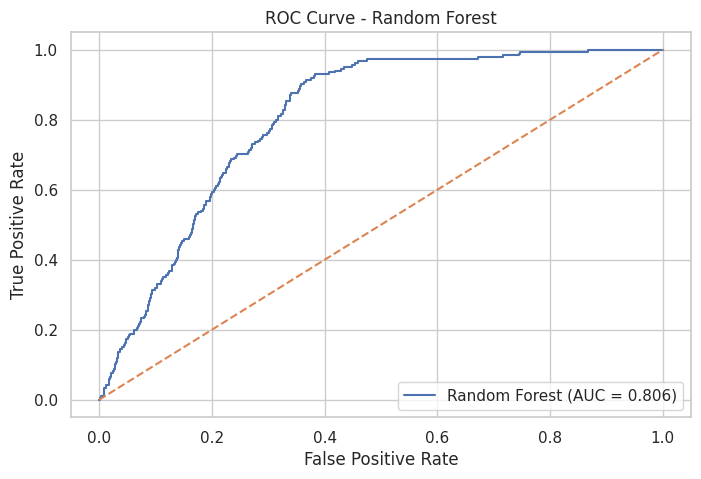

In [46]:
#MODEL 3 - RANDOM FOREST (ENSEMBLE)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=50,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train_smote)

y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

y_train_proba_rf = rf.predict_proba(X_train_scaled)[:, 1]
y_test_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("=== Random Forest Performance on Training Data ===")
metrics_score(y_train_smote, y_train_pred_rf, y_train_proba_rf)

print("\n=== Random Forest Performance on Test Data ===")
metrics_score(y_test, y_test_pred_rf, y_test_proba_rf)

plot_roc_curve(y_test, y_test_proba_rf, model_name="Random Forest")

In [47]:
# Simple cross-validation on Random Forest using ROC-AUC
cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train_smote, cv=5, scoring="roc_auc", n_jobs=-1)
print("Random Forest 5-fold CV ROC-AUC:", cv_scores_rf)
print("Mean CV ROC-AUC:", cv_scores_rf.mean().round(4))

Random Forest 5-fold CV ROC-AUC: [0.94515848 0.99975688 0.99994089 0.99976134 0.99968699]
Mean CV ROC-AUC: 0.9889



Top 15 features (Random Forest feature_importances_):
Fault                              0.109961
BasePolicy_Liability               0.080959
PolicyType_Sedan - Liability       0.062325
VehicleCategory_Sport              0.058065
AgeOfVehicle_more than 7           0.036245
PolicyType_Sedan - Collision       0.033456
NumberOfSuppliments_more than 5    0.030852
AgeOfPolicyHolder_41 to 50         0.027914
AgeOfVehicle_7 years               0.026881
Make_Pontiac                       0.026048
PastNumberOfClaims_2 to 4          0.025943
Make_Toyota                        0.025339
BasePolicy_Collision               0.021662
AgeOfPolicyHolder_36 to 40         0.019672
DriverRating                       0.019366
dtype: float64


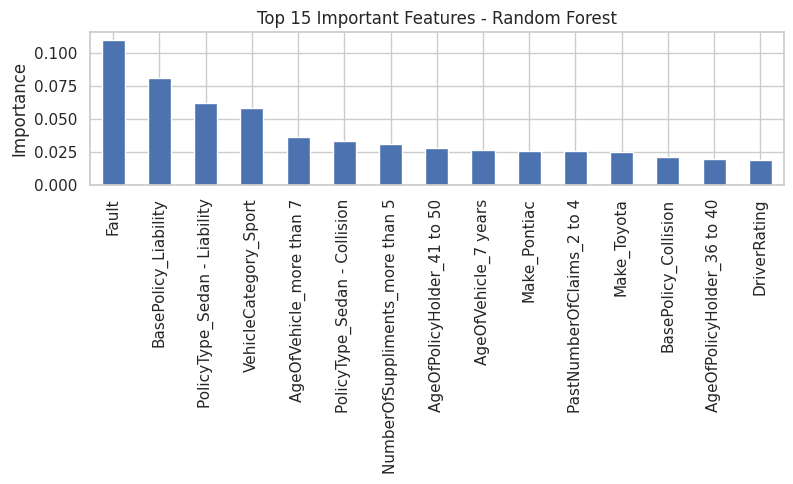

In [48]:
# Feature importance
feature_importance_rf = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)

print("\nTop 15 features (Random Forest feature_importances_):")
print(feature_importance_rf.head(15))

feature_importance_rf.head(15).plot(kind="bar")
plt.title("Top 15 Important Features - Random Forest")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()